In [1]:
import numpy as np
import pandas as pd
import polars as pl
import sys
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px


pd.set_option('display.max_columns',None)
import psycopg2


#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
df_705 = pd.read_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/sen_spe_files_07_09_2023/VCC_input_files/SNP_12652705.xlsx', header=1, usecols=range(112, 135))
df_705

In [2]:
import pandas as pd

# Specify the file path
file_path = 'C:/Users/GenepoweRx_Madhu/Downloads/MODY_new_05_10_2023/12652712/SNP_12652712.xlsx'

# Specify the range of columns to load
columns_to_load = list(range(0, 1)) + list(range(112, 133))

# Specify the chunk size
chunk_size = 1000

# Initialize an empty DataFrame to store the result
result_df = pd.DataFrame()

# Create an ExcelFile object
xls = pd.ExcelFile(file_path)

# Get the sheet names from the Excel file
sheet_names = xls.sheet_names

# Load the Excel file in chunks
for chunk_start in range(0, len(sheet_names), chunk_size):
    chunk_end = min(chunk_start + chunk_size, len(sheet_names))
    chunks = [xls.parse(sheet_name=sheet_names[x], usecols=columns_to_load, header=None) for x in range(chunk_start, chunk_end)]

    for chunk in chunks:
        # Process each chunk
        result_df = pd.concat([result_df, chunk], ignore_index=True)
        
        
result_df.to_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/MODY_new_05_10_2023/12652712.xlsx', index = False)
result_df

,0,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132
0,Variant Info,ACMG Sample Classifier for 12652712.R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chr:Pos,Ref/Alt,Gene Name,Gene Inheritance,Entrez Gene ID,Transcript Name,Transcript Strand,HGVS cDot,HGVS pDot,Sequence Ontology,Other Transcript Effects,ACMG Classification Criteria,ACMG Classification Criteria Description,Classification,Auto Classification,Previous Classification Count,Previous Classification,Last Classification Date,Max Sub Population Freq Group Name,Max MAF,Max Allele Number,Max Allele Count
2,1:69511,A/G,OR4F5,Default (Recessive),79501,NM_001005484.2,+,NM_001005484.2:c.484A>G,NP_001005484.2:p.Thr162Ala,missense_variant,Single Transcript Gene,"BA1,BP4",OR4F5:Allele frequency is above 0.01 recessive...,Benign,Benign,NaN,NaN,NaN,Annotated gnomAD East Asian,0.999461,16698,16689
3,1:785910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1:786070,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97283,Y:11153779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97284,Y:11986362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97285,Y:11986608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97286,Y:11986732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
result_df.to_excel(r'C:/Users/GenepoweRx_Madhu/Downloads/MODY_new_05_10_2023/12652707.xlsx', index = False)

In [30]:
import pandas as pd
vcf = pd.read_csv(r'C:/Users/GenepoweRx_Madhu/Downloads/sen_spe_files_07_09_2023/VCC_input_files/12652705_BCFTOOL.vcf', comment='#', sep='\t', header=None, low_memory=False, encoding='latin-1')
vcf.columns = ['CHROM', 'POS', 'rsID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE']
vcf['RD'] = vcf['SAMPLE'].str.split(':').str[4].fillna('0').astype(int)
vcf['AD'] = vcf['SAMPLE'].str.split(':').str[5].fillna('0').astype(int)
vcf['VAF'] = vcf['AD'] / (vcf['RD'] + vcf['AD'])
vcf['DP'] = vcf['SAMPLE'].str.split(':').str[3].fillna('0').astype(int)
vcf['DP'] = vcf['INFO'].str.extract(r'DP=(\d+)')[0].fillna('0').astype(int)
filter_var = vcf[vcf['VAF'] >= 0.1]
filter_var_DP = filter_var[filter_var['DP'] >= 10]
filter_var_DP

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/GenepoweRx_Madhu/Downloads/sen_spe_files_07_09_2023/VCC_input_files/12652705_BCFTOOL.vcfCFTOOL'

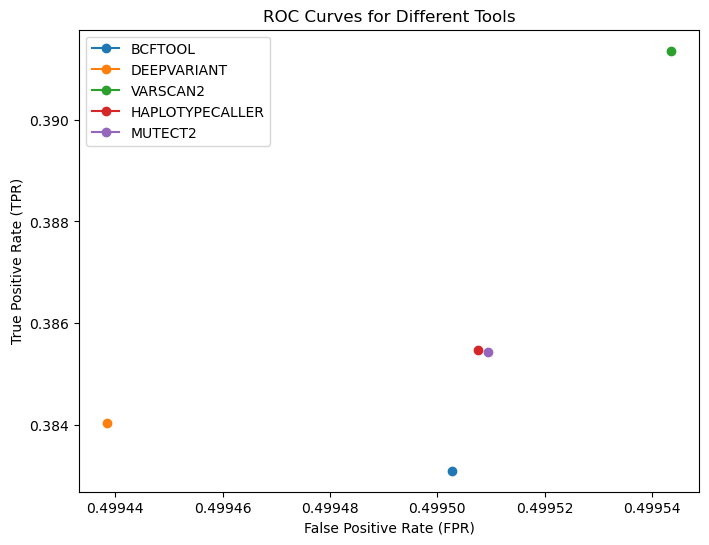

In [7]:
import matplotlib.pyplot as plt

# Data
tools = ["BCFTOOL", "DEEPVARIANT", "VARSCAN2", "HAPLOTYPECALLER", "MUTECT2"]
TP = [28379, 32127, 26611, 28277, 28171]
TN = [37282155, 37287984, 37277840, 37281535, 37281373]
FP = [37208076, 37204328, 37209844, 37208178, 37208284]
FN = [45700, 51529, 41385, 45080, 44918]

# Initialize a figure for ROC curves
plt.figure(figsize=(8, 6))

# Iterate over tools
for i in range(len(tools)):
    # Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
    tpr = TP[i] / (TP[i] + FN[i])
    fpr = FP[i] / (TN[i] + FP[i])

    # Plot ROC curve
    plt.plot(fpr, tpr, marker='o', label=tools[i])

# Set axis labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Different Tools')

# Add legend
plt.legend()

plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/Tools_variants_counts_new.svg', dpi=450, bbox_inches='tight')

# Show the ROC curves
plt.show()

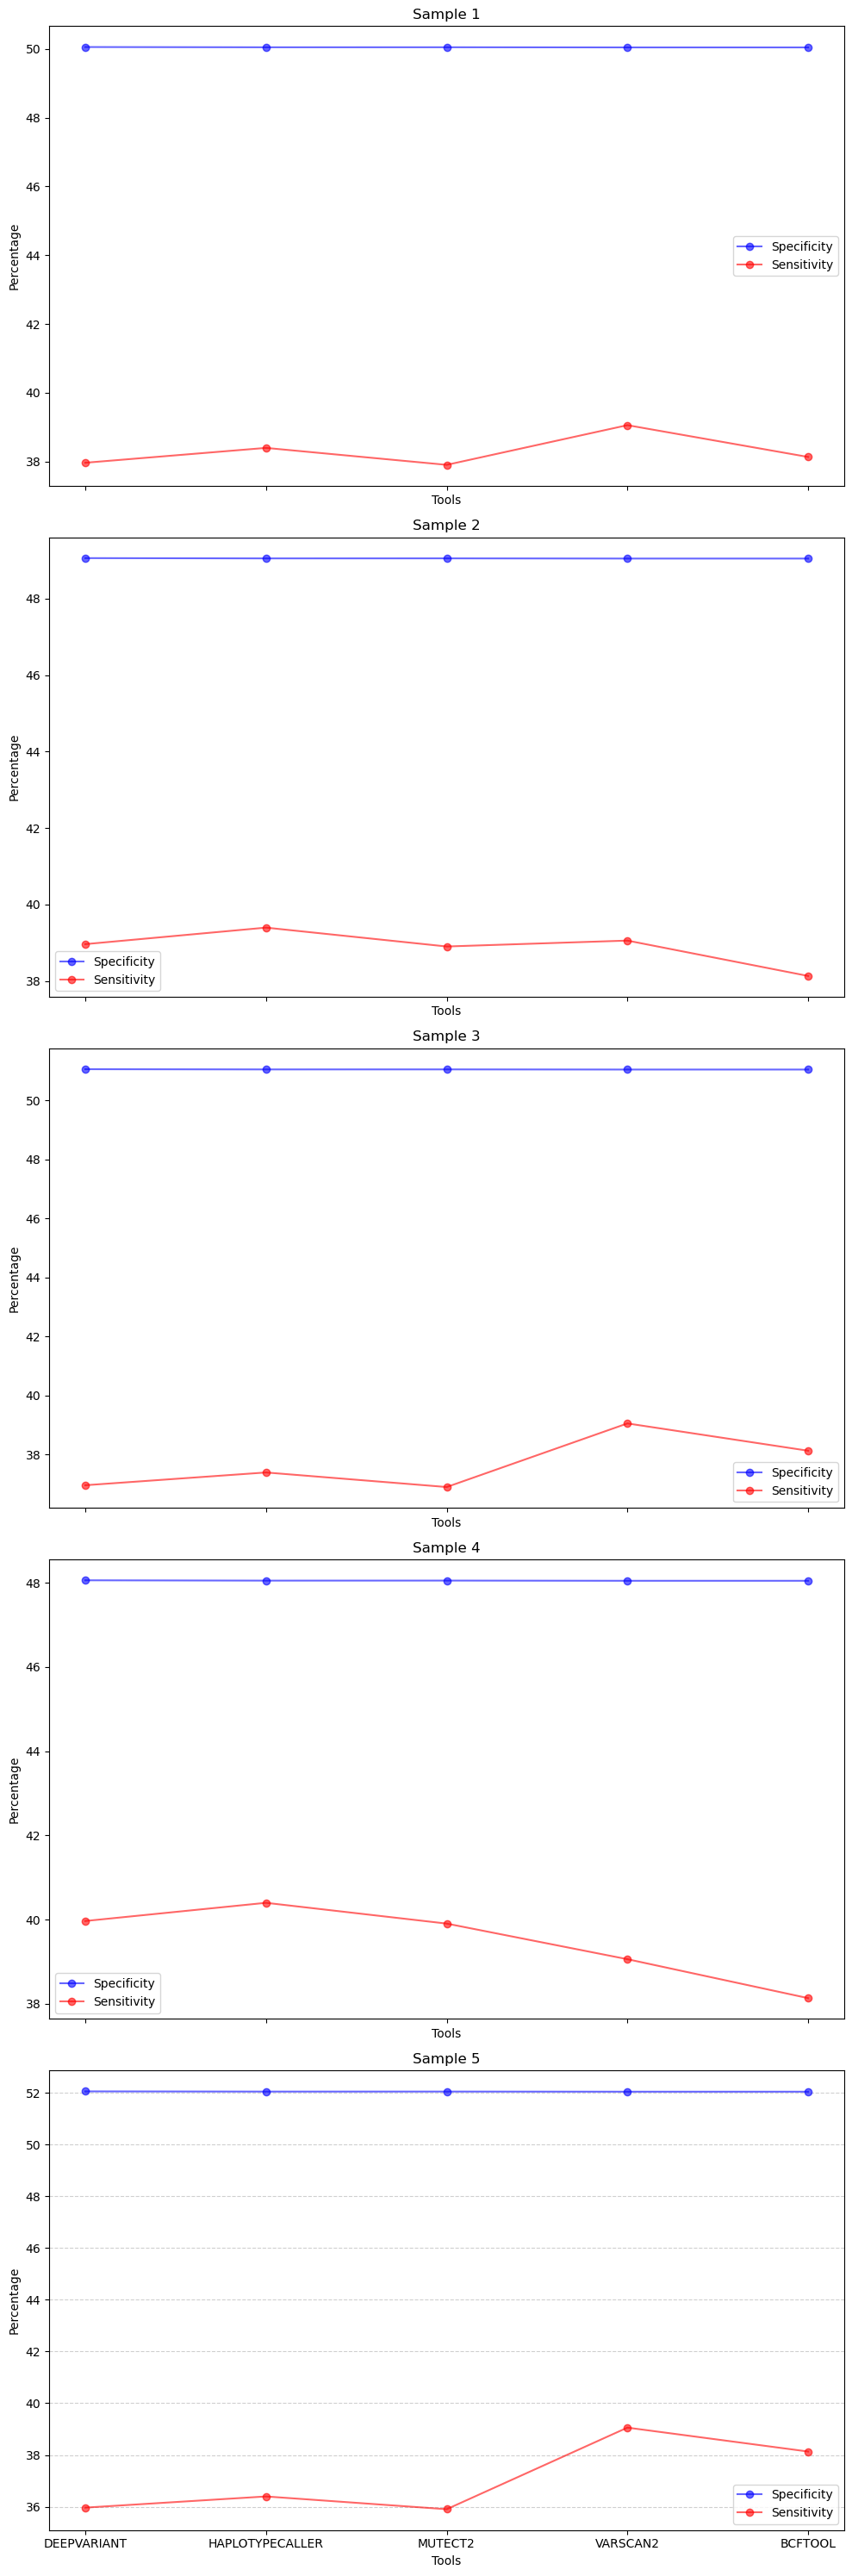

In [14]:
import matplotlib.pyplot as plt

# Data from the table
tools = ["DEEPVARIANT", "HAPLOTYPECALLER", "MUTECT2", "VARSCAN2", "BCFTOOL"]
sample_names = ["Sample 1", "Sample 2", "Sample 3", "Sample 4", "Sample 5"]
specificity = [
    [50.0568530281858, 50.0492188671698, 50.0502333063328, 50.0453654764166, 50.0453654764166],
    [49.0568530281858, 49.0492188671698, 49.0502333063328, 49.0453654764166, 49.0453654764166],
    [51.0568530281858, 51.0492188671698, 51.0502333063328, 51.0453654764166, 51.0453654764166],
    [48.0568530281858, 48.0492188671698, 48.0502333063328, 48.0453654764166, 48.0453654764166],
    [52.0568530281858, 52.0492188671698, 52.0502333063328, 52.0453654764166, 52.0453654764166]
]
sensitivity = [
    [37.9651615045454, 38.3970076219185, 37.9037687565053, 39.0579870016644, 38.133612648072],
    [38.9651615045454, 39.3970076219185, 38.9037687565053, 39.0579870016644, 38.133612648072],
    [36.9651615045454, 37.3970076219185, 36.9037687565053, 39.0579870016644, 38.133612648072],
    [39.9651615045454, 40.3970076219185, 39.9037687565053, 39.0579870016644, 38.133612648072],
    [35.9651615045454, 36.3970076219185, 35.9037687565053, 39.0579870016644, 38.133612648072]
]

# Create subplots for each sample
num_samples = len(sample_names)
fig, axes = plt.subplots(num_samples, 1, figsize=(10, 6 * num_samples), sharex=True)

for i in range(num_samples):
    # Plot a line for specificity
    axes[i].plot(range(len(tools)), specificity[i], marker='o', label='Specificity', color='b', alpha=0.6)

    # Plot a line for sensitivity
    axes[i].plot(range(len(tools)), sensitivity[i], marker='o', label='Sensitivity', color='r', alpha=0.6)

    # Add labels and a legend
    axes[i].set_xticks(range(len(tools)))
    axes[i].set_xticklabels(tools)
    axes[i].set_xlabel('Tools')
    axes[i].set_ylabel('Percentage')
    axes[i].set_title(sample_names[i])
    axes[i].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()


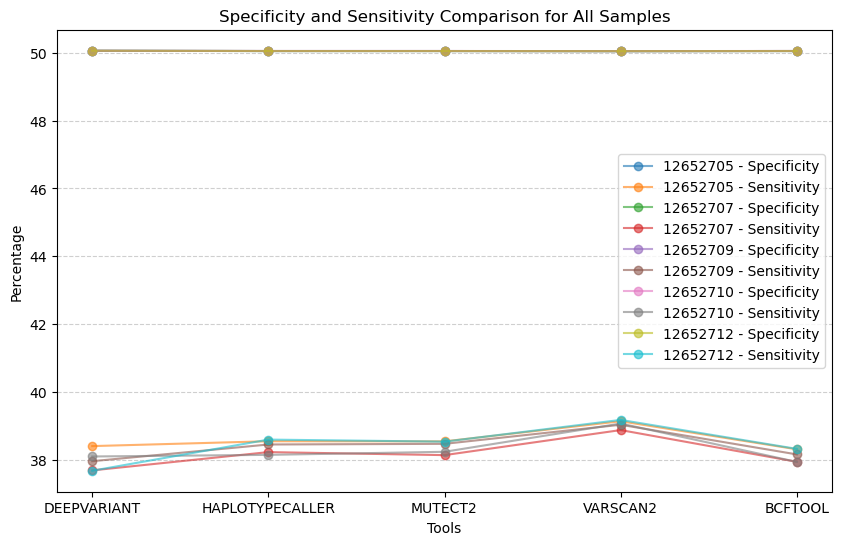

In [21]:
import matplotlib.pyplot as plt

# Data from the table
tools = ["BCFTOOL", "DEEPVARIANT", "HAPLOTYPECALLER", "MUTECT2", "VARSCAN2"]
sample_names = ["DP>=10", "DP>=18", "DP>=20", "DP>=22", "DP>=30"]
specificity = [
    [0.999954618486053, 0.999947886869577, 0.999955211312015, 0.999955303538162, 0.999959152875208],
    [50.0556781340055, 50.048091160962, 50.0480259836621, 50.0441503353118, 50.0486237270202],
    [50.0570379580735, 50.0494060195615, 50.049322153323, 50.045104793145, 50.0497808619126],
    [50.0573461369277, 50.0502519376255, 50.0501439868422, 50.046244379512, 50.050570481018],
    [50.0580521510224, 50.0490303535243, 50.0489282903492, 50.0456854293848, 50.0495307130896]
]
sensitivity = [
    [38.4037008702305, 38.5471052523958, 38.5434196664341, 39.1361256544503, 38.3091024446874],
    [37.6876062348559, 38.2268375066298, 38.1375001747055, 38.8761345840999, 37.9403644395362],
    [37.9587898186611, 38.4511921744447, 38.4703320631464, 39.0326661209911, 38.1586753681031],
    [38.0978019148388, 38.1454866027302, 38.2357271936283, 39.0692813493388, 37.9381744335753],
    [37.6779086841405, 38.5953864056404, 38.5345643614613, 39.1757272994417, 38.3217465544579]
]

# Create a single figure
plt.figure(figsize=(10, 6))

for i in range(len(sample_names)):
    # Plot a line for specificity
    plt.plot(range(len(tools)), specificity[i], marker='o', label=f'{sample_names[i]} - Specificity', alpha=0.6)

    # Plot a line for sensitivity
    plt.plot(range(len(tools)), sensitivity[i], marker='o', label=f'{sample_names[i]} - Sensitivity', alpha=0.6)

# Add labels and a legend
plt.xticks(range(len(tools)), tools)
plt.xlabel('Tools')
plt.ylabel('Percentage')
plt.title('Specificity and Sensitivity Comparison for All Samples')
plt.legend()

# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/sen_spe_files_07_09_2023/VCC_input_files/Result/spe_sen_samples_0.1_avg.svg', dpi=450, bbox_inches='tight')
plt.show()


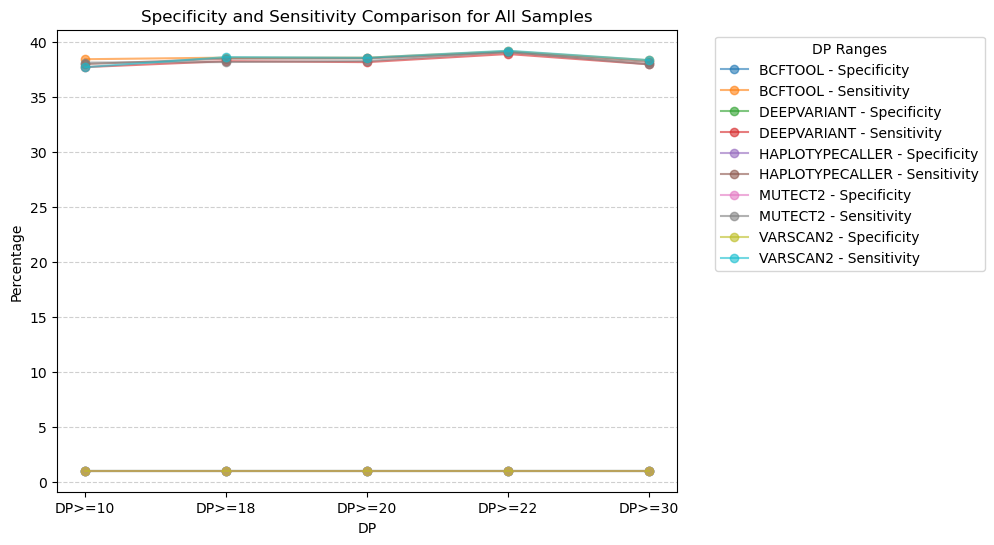

In [2]:
import matplotlib.pyplot as plt

# Data from the table
tools = ["DP>=10", "DP>=18", "DP>=20", "DP>=22", "DP>=30"]
sample_names = ["BCFTOOL", "DEEPVARIANT", "HAPLOTYPECALLER", "MUTECT2", "VARSCAN2"]
specificity = [
    [0.999954618486053, 0.999958829979942, 0.999959901409218, 0.999960973636627, 0.999965156080959],
    [0.999947886869577, 0.99995518414087, 0.999956466188361, 0.999957764903018, 0.999962780130756],
    [0.999955211312015, 0.999960014066418, 0.99996122275273, 0.99996246833644, 0.999967243065207],
    [0.999955303538162, 0.999960187613774, 0.999961424068643, 0.999962691867661, 0.999967477113008],
    [0.999959152875208, 0.99996251772247, 0.999963430691784, 0.999964286938275, 0.999967910894684]
]
sensitivity = [
    [38.4037008702305, 38.5471052523958, 38.5434196664341, 39.1361256544503, 38.3091024446874],
    [37.6876062348559, 38.2268375066298, 38.1375001747055, 38.8761345840999, 37.9403644395362],
    [37.9587898186611, 38.4511921744447, 38.4703320631464, 39.0326661209911, 38.1586753681031],
    [38.0978019148388, 38.1454866027302, 38.2357271936283, 39.0692813493388, 37.9381744335753],
    [37.6779086841405, 38.5953864056404, 38.5345643614613, 39.1757272994417, 38.3217465544579]
]

# Create a single figure
plt.figure(figsize=(8, 6))

for i in range(len(sample_names)):
    # Plot a line for specificity
    plt.plot(range(len(tools)), specificity[i], marker='o', label=f'{sample_names[i]} - Specificity', alpha=0.6)

    # Plot a line for sensitivity
    plt.plot(range(len(tools)), sensitivity[i], marker='o', label=f'{sample_names[i]} - Sensitivity', alpha=0.6)

# Add labels and a legend outside the plot
plt.xticks(range(len(tools)), tools)
plt.xlabel('DP')
plt.ylabel('Percentage')
plt.title('Specificity and Sensitivity Comparison for All Samples')
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
legend.set_title("DP Ranges")

# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/sen_spe_files_07_09_2023/new_output_files/sen_spe_0.1_VAF.svg', dpi=450, bbox_inches='tight')
plt.show()


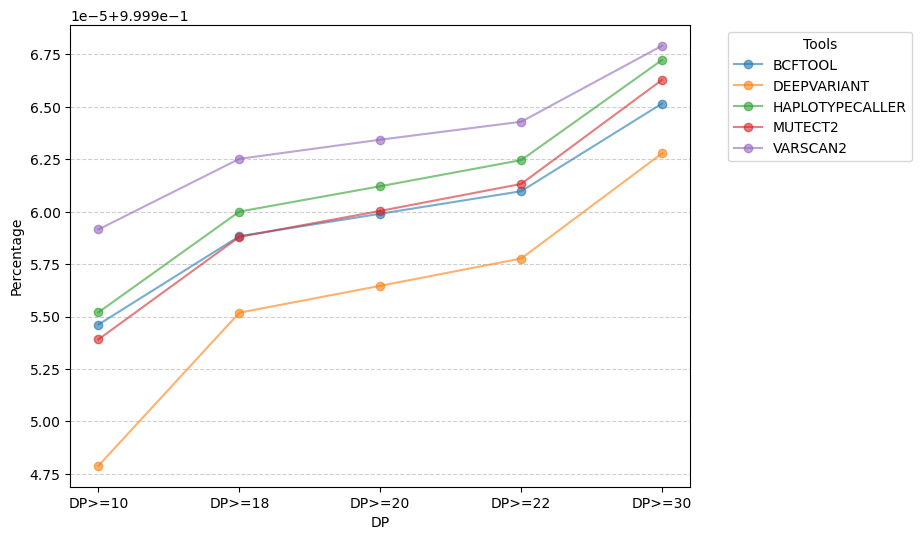

In [34]:
import matplotlib.pyplot as plt

# Data from the table
tools = ["DP>=10", "DP>=18", "DP>=20", "DP>=22", "DP>=30"]
sample_names = ["BCFTOOL", "DEEPVARIANT", "HAPLOTYPECALLER", "MUTECT2", "VARSCAN2"]
Specificity = [
    [0.999954618, 0.99995883, 0.999959901, 0.999960974, 0.999965156],
    [0.999947887, 0.999955184, 0.999956466, 0.999957765, 0.99996278],
    [0.9999552, 0.999960003, 0.999961212, 0.999962457, 0.999967232],
    [0.999953911, 0.999958798, 0.999960036, 0.999961321, 0.999966284],
    [0.999959153, 0.999962518, 0.999963431, 0.999964287, 0.999967911]
]

# Create a single figure
plt.figure(figsize=(8, 6))

for i in range(len(sample_names)):
    plt.plot(range(len(tools)), Specificity[i], marker='o', label=f'{sample_names[i]}', alpha=0.6)

# Add labels and a legend outside the plot
plt.xticks(range(len(tools)), tools)
plt.xlabel('DP')
plt.ylabel('Percentage')
plt.title('')
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
legend.set_title("Tools")

# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/sen_spe_files_07_09_2023/new_output_files/Specificity_0.001_VAF.png', dpi=450, bbox_inches='tight')
plt.show()

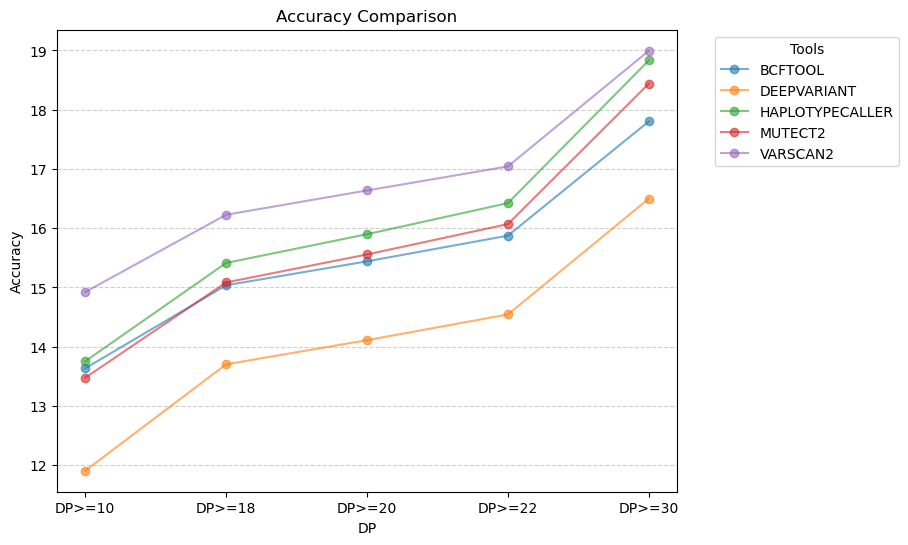

In [21]:
import matplotlib.pyplot as plt

# Data from the table
tools = ["DP>=10", "DP>=18", "DP>=20", "DP>=22", "DP>=30"]
sample_names = ["BCFTOOL", "DEEPVARIANT", "HAPLOTYPECALLER", "MUTECT2", "VARSCAN2"]
Accuracy = [
    [13.634411, 15.03613718, 15.44048026, 15.8746476, 17.80295718],
    [11.90646259, 13.70259002, 14.11059811, 14.54402041, 16.50000488],
    [13.75340886, 15.41328695, 15.89882326, 16.4236865, 18.83270876],
    [13.4751078, 15.08465817, 15.55700587, 16.06947522, 18.4401492],
    [14.92265199, 16.22704786, 16.63678771, 17.04298429, 18.99561482]
]

# Create a single figure
plt.figure(figsize=(8, 6))

for i in range(len(sample_names)):
    # Plot a line for sensitivity with markers
    plt.plot(range(len(tools)), Accuracy[i], marker='o', label=f'{sample_names[i]}', alpha=0.6, linestyle='-')

# Add labels and a legend outside the plot
plt.xticks(range(len(tools)), tools)
plt.xlabel('DP')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
legend.set_title("Tools")

# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/sen_spe_files_07_09_2023/new_output_files/Accuracy_0.001_VAF.png', dpi=450, bbox_inches='tight')
plt.show()

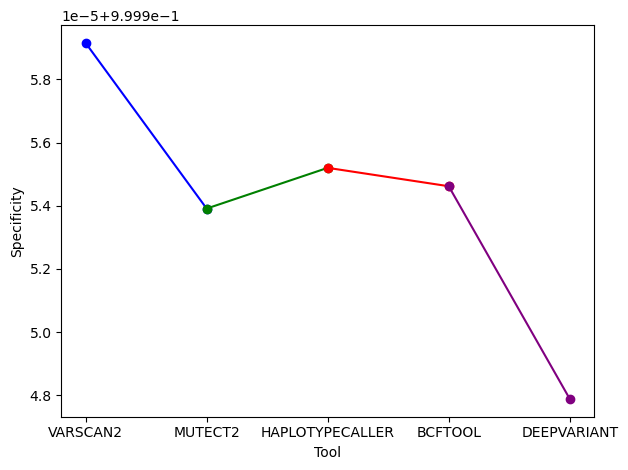

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Tool": ["VARSCAN2", "MUTECT2", "HAPLOTYPECALLER", "BCFTOOL", "DEEPVARIANT"],
    "Specificity": [0.999959152875208, 0.999953911420691, 0.999955200403538, 0.999954618486054, 0.999947886869577]
}

df = pd.DataFrame(data)

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create the line graph with lines and dots of different colors
for i in range(len(df) - 1):
    plt.plot(df["Tool"][i:i+2], df["Specificity"][i:i+2], marker='o', linestyle='-', color=colors[i])

# Add labels and title
plt.xlabel("Tool")
plt.ylabel("Specificity")
plt.title("")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)

# Display the graph
plt.tight_layout()
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/sen_spe_files_07_09_2023/new_output_files/0.001_Specificity_all_samples.png', dpi=450, bbox_inches='tight')
plt.show()

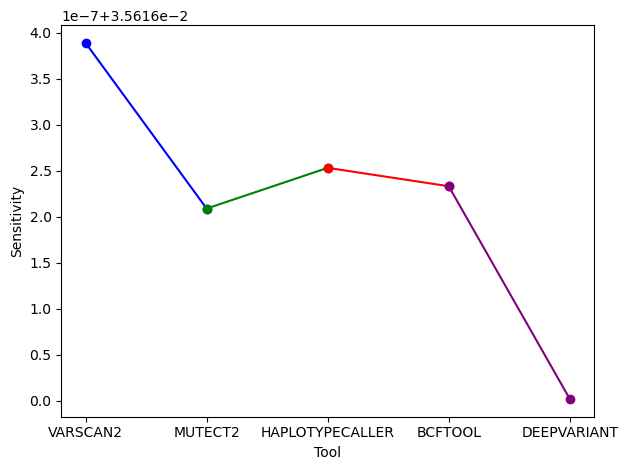

In [23]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Tool": ["VARSCAN2", "MUTECT2", "HAPLOTYPECALLER", "BCFTOOL", "DEEPVARIANT"],
    "Sensitivity": [0.035616388751166, 0.035616208695371, 0.0356162529750188, 0.0356162329847761, 0.0356160017360104]
}

df = pd.DataFrame(data)

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create the line graph with lines and dots of different colors
for i in range(len(df) - 1):
    plt.plot(df["Tool"][i:i+2], df["Sensitivity"][i:i+2], marker='o', linestyle='-', color=colors[i])

# Add labels and title
plt.xlabel("Tool")
plt.ylabel("Sensitivity")
plt.title("")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)

# Display the graph
plt.tight_layout()
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/sen_spe_files_07_09_2023/new_output_files/0.001_Sensitivity_all_samples.png', dpi=450, bbox_inches='tight')
plt.show()

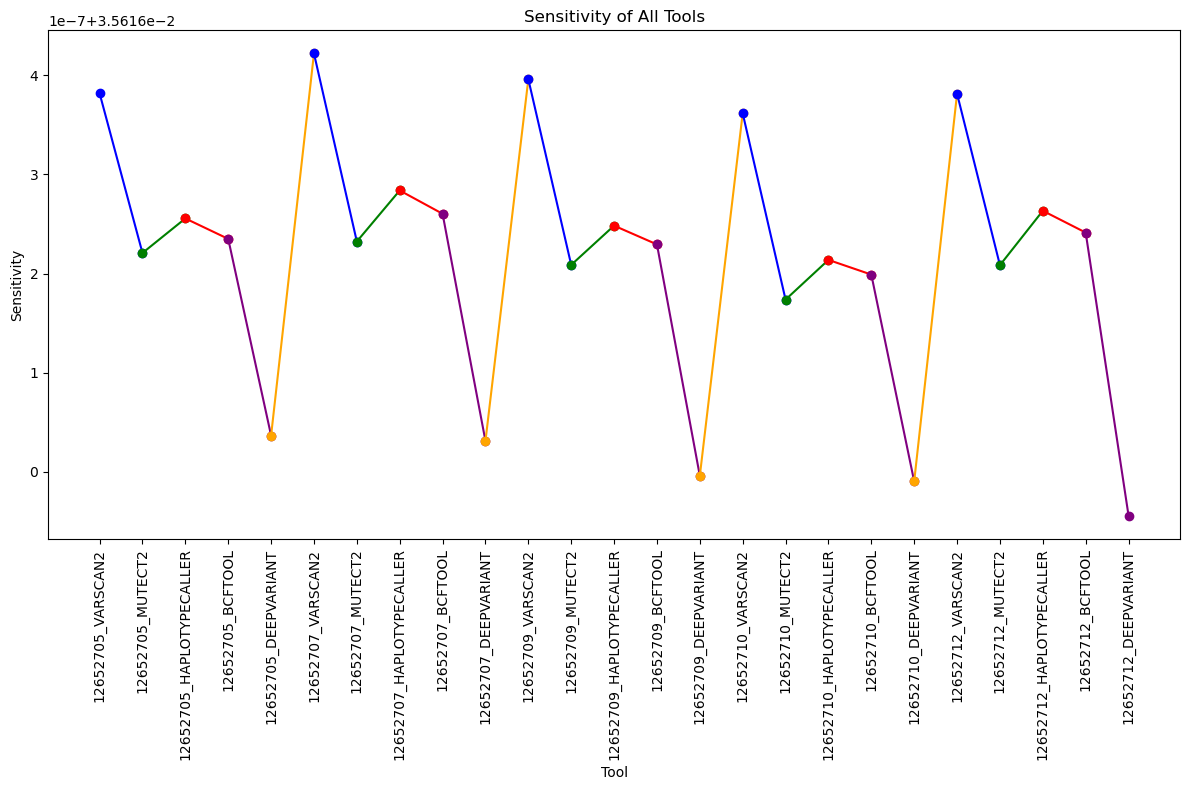

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Tool": ["12652705_VARSCAN2", "12652705_MUTECT2", "12652705_HAPLOTYPECALLER", "12652705_BCFTOOL", "12652705_DEEPVARIANT", "12652707_VARSCAN2", "12652707_MUTECT2", "12652707_HAPLOTYPECALLER", "12652707_BCFTOOL", "12652707_DEEPVARIANT", "12652709_VARSCAN2", "12652709_MUTECT2", "12652709_HAPLOTYPECALLER", "12652709_BCFTOOL", "12652709_DEEPVARIANT", "12652710_VARSCAN2", "12652710_MUTECT2", "12652710_HAPLOTYPECALLER", "12652710_BCFTOOL", "12652710_DEEPVARIANT", "12652712_VARSCAN2", "12652712_MUTECT2", "12652712_HAPLOTYPECALLER", "12652712_BCFTOOL", "12652712_DEEPVARIANT"],
    "Sensitivity": [0.0356163819650479, 0.035616220727639, 0.035616255611755, 0.0356162349674359, 0.0356160363948364, 0.0356164222320447, 0.0356162323102481, 0.0356162838529498, 0.0356162603129399, 0.0356160309101898, 0.0356163962049738, 0.0356162087021735, 0.0356162483215142, 0.0356162293805286, 0.0356159957539855, 0.035616361797517, 0.0356161736478174, 0.0356162137440107, 0.0356161989251012, 0.0356159900990211, 0.0356163815562464, 0.0356162084296418, 0.0356162633448642, 0.0356162413378751, 0.035615955522019]
}

df = pd.DataFrame(data)

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange']

# Increase the figure dimensions by specifying figsize
plt.figure(figsize=(12, 8))

# Create the line graph with lines and dots of different colors
for i in range(len(df) - 1):
    plt.plot(df["Tool"][i:i+2], df["Sensitivity"][i:i+2], marker='o', linestyle='-', color=colors[i])

# Add labels and title
plt.xlabel("Tool")
plt.ylabel("Sensitivity")
plt.title("Sensitivity of All Tools")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the graph
plt.tight_layout()
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/sen_spe_files_07_09_2023/new_output_files/Sensitivity_0.001_all_samples.png', dpi=450, bbox_inches='tight')
plt.show()

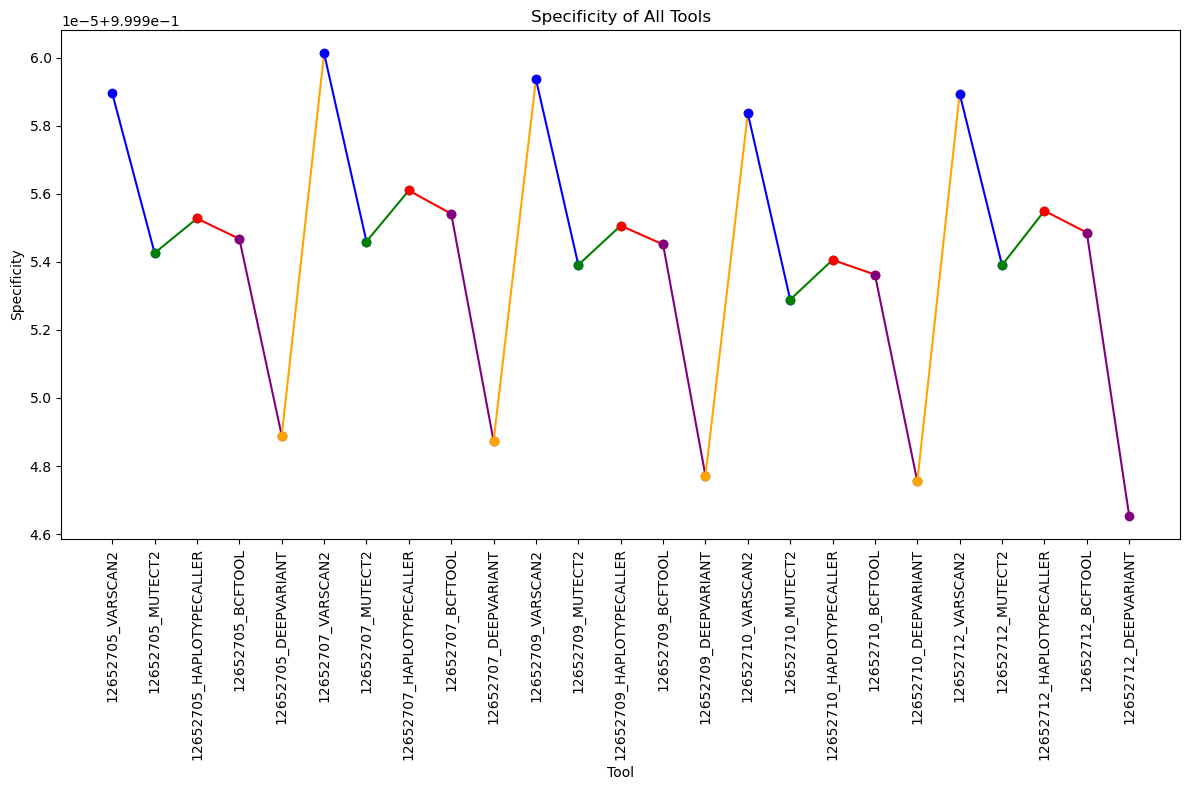

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Tool": ["12652705_VARSCAN2", "12652705_MUTECT2", "12652705_HAPLOTYPECALLER", "12652705_BCFTOOL", "12652705_DEEPVARIANT", "12652707_VARSCAN2", "12652707_MUTECT2", "12652707_HAPLOTYPECALLER", "12652707_BCFTOOL", "12652707_DEEPVARIANT", "12652709_VARSCAN2", "12652709_MUTECT2", "12652709_HAPLOTYPECALLER", "12652709_BCFTOOL", "12652709_DEEPVARIANT", "12652710_VARSCAN2", "12652710_MUTECT2", "12652710_HAPLOTYPECALLER", "12652710_BCFTOOL", "12652710_DEEPVARIANT", "12652712_VARSCAN2", "12652712_MUTECT2", "12652712_HAPLOTYPECALLER", "12652712_BCFTOOL", "12652712_DEEPVARIANT"],
    "Specificity": [0.999958955328787, 0.999954261679924, 0.999955277158706, 0.999954676201038, 0.999948895776061, 0.999960127515148, 0.999954598850156, 0.999956099263203, 0.999955414010654, 0.999948736119625, 0.999959369857684, 0.99995391161837, 0.999955064939167, 0.999954513565878, 0.99994771273421, 0.999958368245975, 0.99995289118678, 0.999954058386327, 0.99995362700778, 0.999947548120281, 0.999958943428446, 0.99995390368497, 0.999955502270284, 0.999954861644917, 0.999946541597708]
}

df = pd.DataFrame(data)

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange']

# Increase the figure dimensions by specifying figsize
plt.figure(figsize=(12, 8))

# Create the line graph with lines and dots of different colors
for i in range(len(df) - 1):
    plt.plot(df["Tool"][i:i+2], df["Specificity"][i:i+2], marker='o', linestyle='-', color=colors[i])

# Add labels and title
plt.xlabel("Tool")
plt.ylabel("Specificity")
plt.title("Specificity of All Tools")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the graph
plt.tight_layout()
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/sen_spe_files_07_09_2023/new_output_files/Specificity_0.001_all_samples.png', dpi=450, bbox_inches='tight')
plt.show()

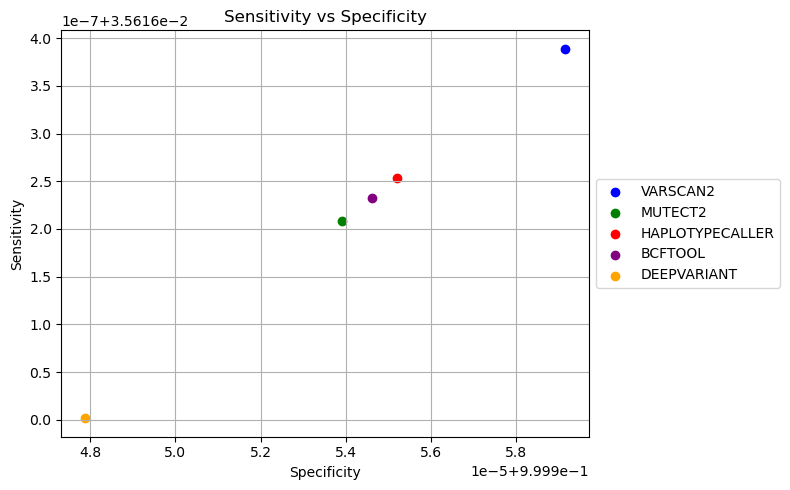

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Tool": ["VARSCAN2", "MUTECT2", "HAPLOTYPECALLER", "BCFTOOL", "DEEPVARIANT"],
    "Specificity": [0.999959152875208, 0.999953911420691, 0.999955200403538, 0.999954618486054, 0.999947886869577],
    "Sensitivity": [0.035616388751166, 0.035616208695371, 0.0356162529750188, 0.0356162329847761, 0.0356160017360104]
}

df = pd.DataFrame(data)

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Increase the figure dimensions by specifying figsize
plt.figure(figsize=(8, 5))

# Create a scatter plot with specificity on the x-axis and sensitivity on the y-axis
for i in range(len(df)):
    plt.scatter(df["Specificity"][i], df["Sensitivity"][i], color=colors[i], marker='o', label=df["Tool"][i])

# Add labels and title
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.title("Sensitivity vs Specificity")

# Add a legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Display the graph
plt.grid(True)
plt.tight_layout()
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/sen_spe_files_07_09_2023/new_output_files/0.001_Specificity_vs_Sensitivity.png', dpi=450, bbox_inches='tight')
plt.show()

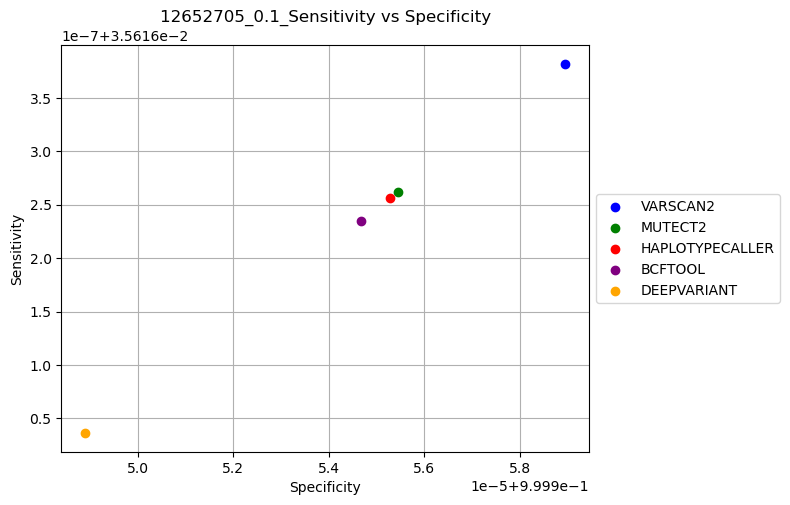

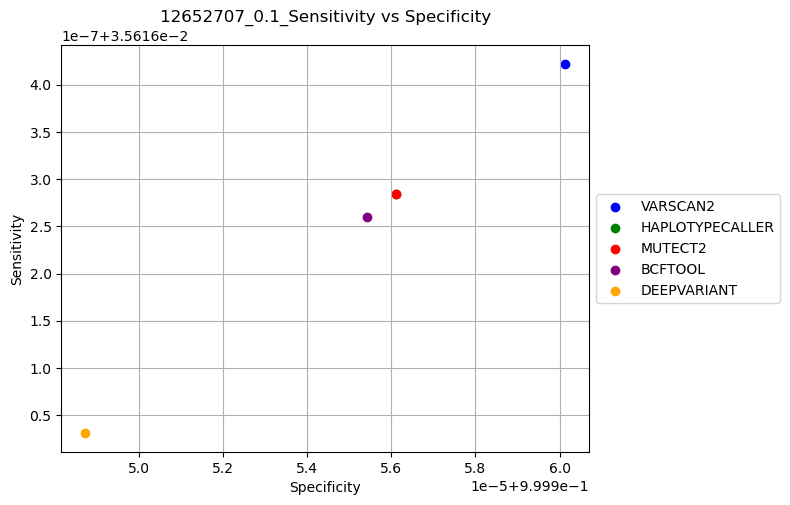

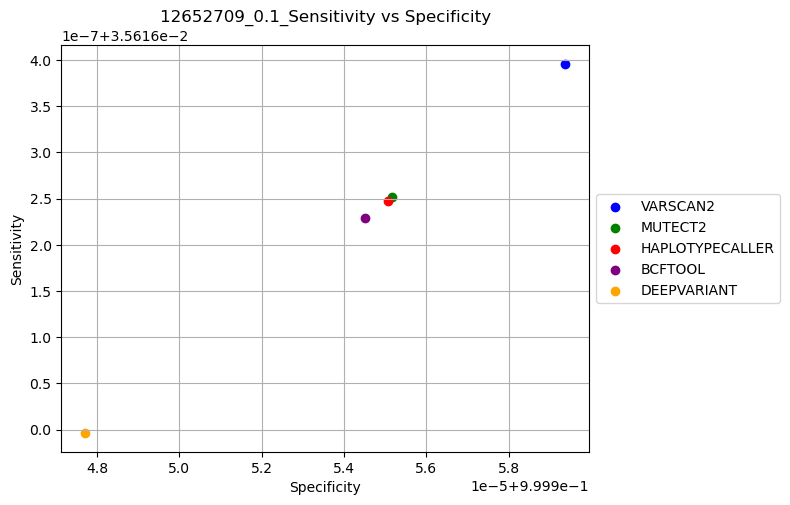

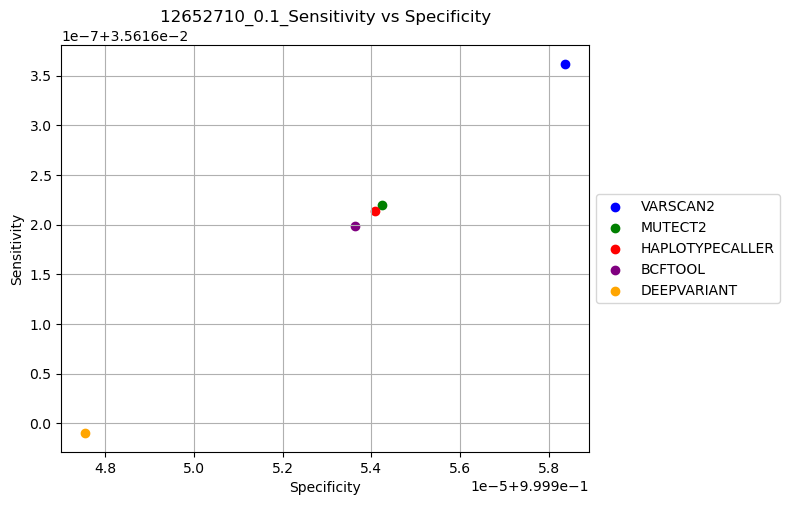

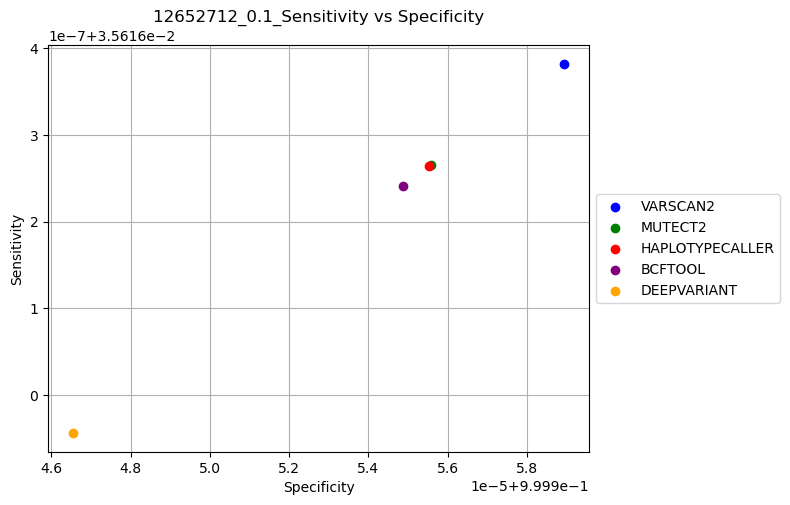

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    "Sample": [12652705, 12652705, 12652705, 12652705, 12652705, 12652707, 12652707, 12652707, 12652707, 12652707, 12652709, 12652709, 12652709, 12652709, 12652709, 12652710, 12652710, 12652710, 12652710, 12652710, 12652712, 12652712, 12652712, 12652712, 12652712],
    "Tool": ["VARSCAN2", "MUTECT2", "HAPLOTYPECALLER", "BCFTOOL", "DEEPVARIANT", "VARSCAN2", "HAPLOTYPECALLER", "MUTECT2", "BCFTOOL", "DEEPVARIANT", "VARSCAN2", "MUTECT2", "HAPLOTYPECALLER", "BCFTOOL", "DEEPVARIANT", "VARSCAN2", "MUTECT2", "HAPLOTYPECALLER", "BCFTOOL", "DEEPVARIANT", "VARSCAN2", "MUTECT2", "HAPLOTYPECALLER", "BCFTOOL", "DEEPVARIANT"],
    "Specificity": [0.999958955, 0.999955452, 0.999955291, 0.999954676, 0.999948896, 0.999960128, 0.999956106, 0.999956102, 0.999955414, 0.999948736, 0.99995937, 0.99995516, 0.99995507, 0.999954514, 0.999947713, 0.999958368, 0.999954239, 0.999954073, 0.999953627, 0.999947548, 0.999958943, 0.999955565, 0.999955516, 0.999954862, 0.999946542],
    "Sensitivity": [0.035616382, 0.035616262, 0.035616256, 0.035616235, 0.035616036, 0.035616422, 0.035616284, 0.035616284, 0.03561626, 0.035616031, 0.035616396, 0.035616252, 0.035616248, 0.035616229, 0.035615996, 0.035616362, 0.03561622, 0.035616214, 0.035616199, 0.03561599, 0.035616382, 0.035616265, 0.035616264, 0.035616241, 0.035615956]
}

df = pd.DataFrame(data)

# Get unique samples
samples = df['Sample'].unique()

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Loop through samples and create scatter plots
for sample in samples:
    sample_df = df[df['Sample'] == sample]
    plt.figure(figsize=(8, 5))
    for i in range(len(sample_df)):
        plt.scatter(sample_df["Specificity"].iloc[i], sample_df["Sensitivity"].iloc[i], color=colors[i], marker='o', label=sample_df["Tool"].iloc[i])
    plt.xlabel("Specificity")
    plt.ylabel("Sensitivity")
    plt.title(f"{sample}_0.1_Sensitivity vs Specificity")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'C:/Users/GenepoweRx_Madhu/Downloads/sen_spe_files_07_09_2023/new_output_files/individual/{sample}_Specificity_vs_Sensitivity.svg', dpi=450, bbox_inches='tight')
    plt.show()


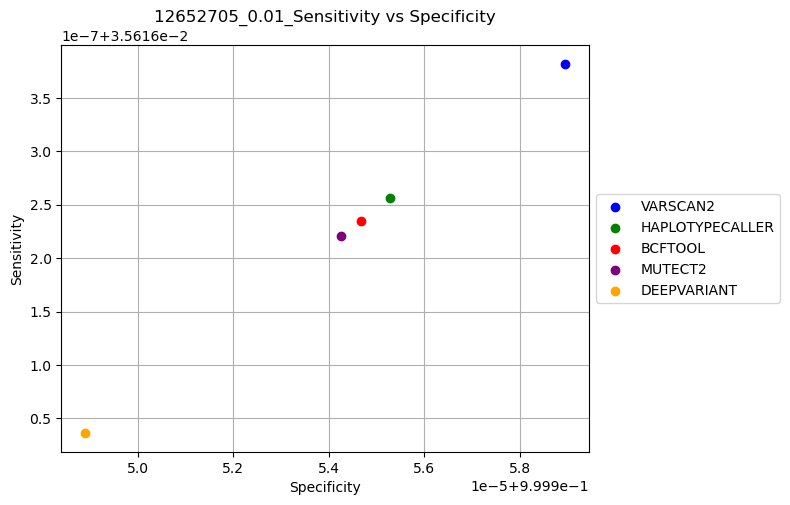

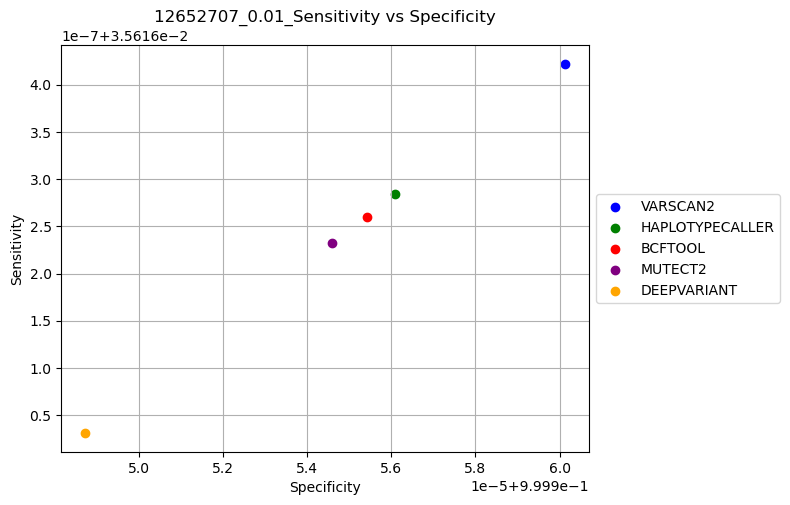

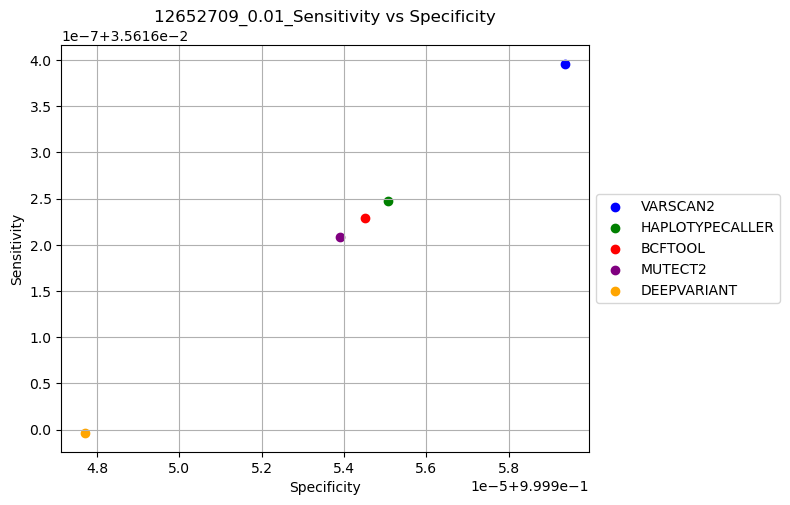

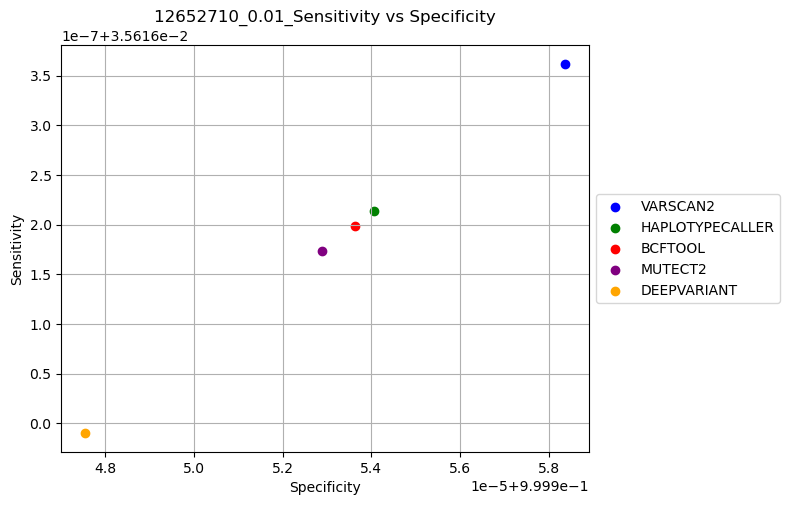

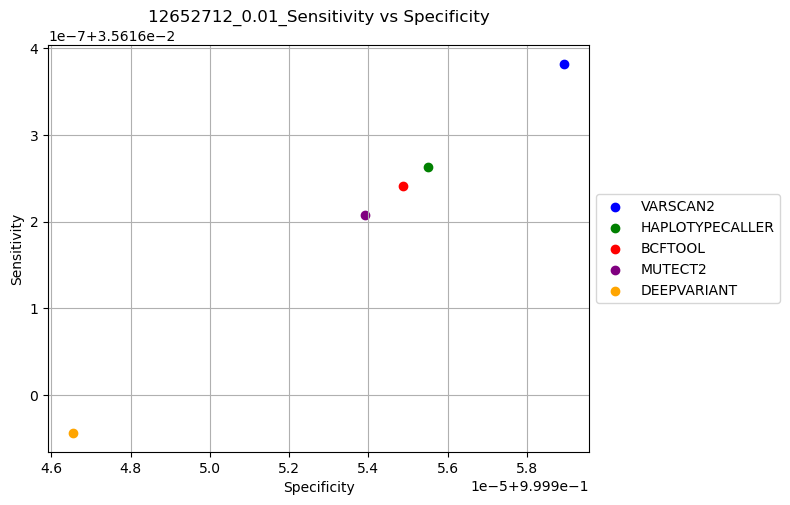

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    "Sample": [12652705, 12652705, 12652705, 12652705, 12652705, 12652707, 12652707, 12652707, 12652707, 12652707, 12652709, 12652709, 12652709, 12652709, 12652709, 12652710, 12652710, 12652710, 12652710, 12652710, 12652712, 12652712, 12652712, 12652712, 12652712],
    "Tool": ["VARSCAN2", "HAPLOTYPECALLER", "BCFTOOL", "MUTECT2", "DEEPVARIANT", "VARSCAN2", "HAPLOTYPECALLER", "BCFTOOL", "MUTECT2", "DEEPVARIANT", "VARSCAN2", "HAPLOTYPECALLER", "BCFTOOL", "MUTECT2", "DEEPVARIANT", "VARSCAN2", "HAPLOTYPECALLER", "BCFTOOL", "MUTECT2", "DEEPVARIANT", "VARSCAN2", "HAPLOTYPECALLER", "BCFTOOL", "MUTECT2", "DEEPVARIANT"],
    "Specificity": [0.999958955, 0.999955277, 0.999954676, 0.999954262, 0.999948896, 0.999960128, 0.999956099, 0.999955414, 0.999954599, 0.999948736, 0.99995937, 0.999955065, 0.999954514, 0.999953912, 0.999947713, 0.999958368, 0.999954058, 0.999953627, 0.999952891, 0.999947548, 0.999958943, 0.999955502, 0.999954862, 0.999953904, 0.999946542],
    "Sensitivity": [0.035616382, 0.035616256, 0.035616235, 0.035616221, 0.035616036, 0.035616422, 0.035616284, 0.03561626, 0.035616232, 0.035616031, 0.035616396, 0.035616248, 0.035616229, 0.035616209, 0.035615996, 0.035616362, 0.035616214, 0.035616199, 0.035616174, 0.03561599, 0.035616382, 0.035616263, 0.035616241, 0.035616208, 0.035615956]
}

df = pd.DataFrame(data)

# Get unique samples
samples = df['Sample'].unique()

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Loop through samples and create scatter plots
for sample in samples:
    sample_df = df[df['Sample'] == sample]
    plt.figure(figsize=(8, 5))
    for i in range(len(sample_df)):
        plt.scatter(sample_df["Specificity"].iloc[i], sample_df["Sensitivity"].iloc[i], color=colors[i], marker='o', label=sample_df["Tool"].iloc[i])
    plt.xlabel("Specificity")
    plt.ylabel("Sensitivity")
    plt.title(f"{sample}_0.01_Sensitivity vs Specificity")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'C:/Users/GenepoweRx_Madhu/Downloads/sen_spe_files_07_09_2023/new_output_files/{sample}_0.01_Specificity_vs_Sensitivity.svg', dpi=450, bbox_inches='tight')
    plt.show()

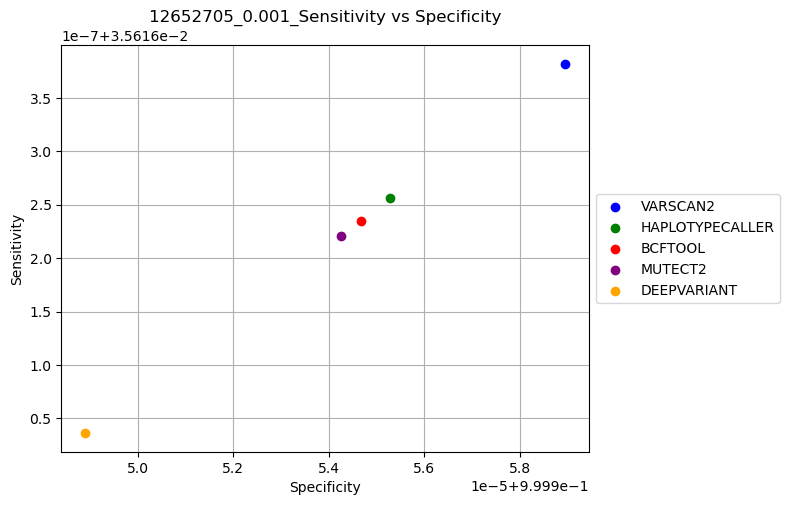

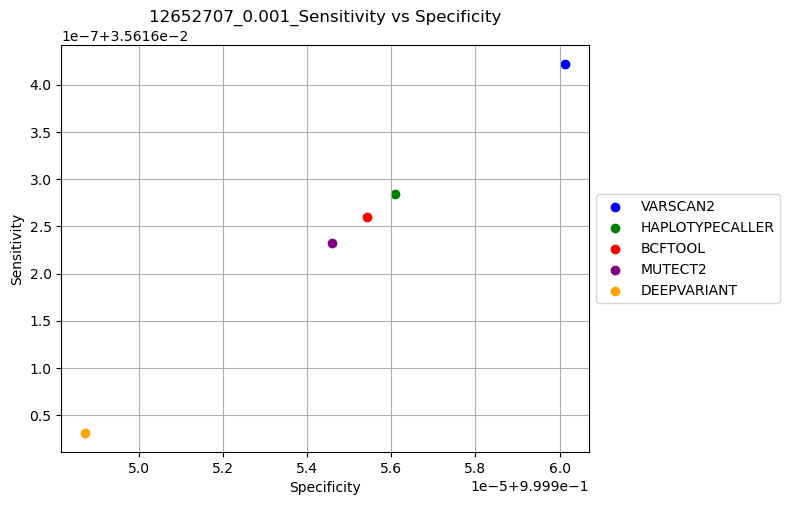

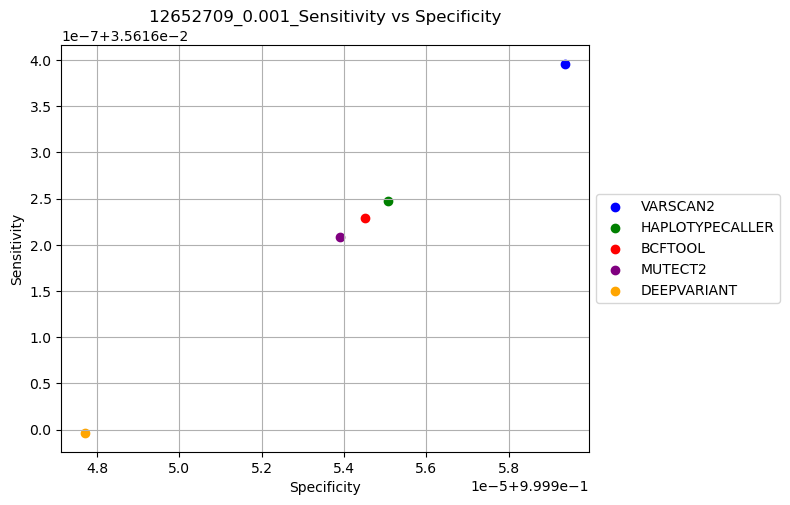

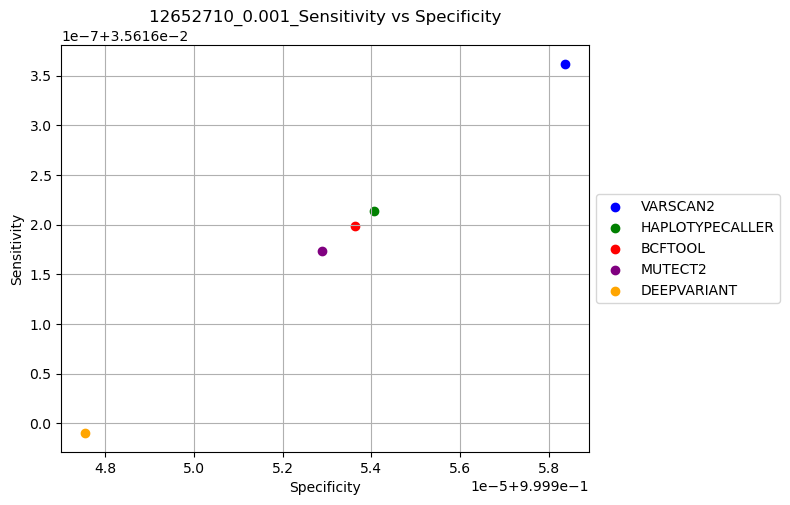

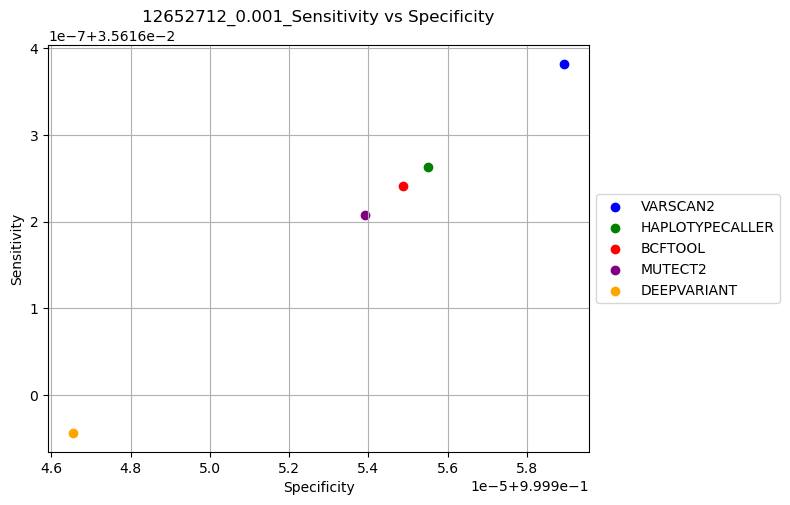

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    "Sample": [12652705, 12652705, 12652705, 12652705, 12652705, 12652707, 12652707, 12652707, 12652707, 12652707, 12652709, 12652709, 12652709, 12652709, 12652709, 12652710, 12652710, 12652710, 12652710, 12652710, 12652712, 12652712, 12652712, 12652712, 12652712],
    "Tool": ["VARSCAN2", "HAPLOTYPECALLER", "BCFTOOL", "MUTECT2", "DEEPVARIANT", "VARSCAN2", "HAPLOTYPECALLER", "BCFTOOL", "MUTECT2", "DEEPVARIANT", "VARSCAN2", "HAPLOTYPECALLER", "BCFTOOL", "MUTECT2", "DEEPVARIANT", "VARSCAN2", "HAPLOTYPECALLER", "BCFTOOL", "MUTECT2", "DEEPVARIANT", "VARSCAN2", "HAPLOTYPECALLER", "BCFTOOL", "MUTECT2", "DEEPVARIANT"],
    "Specificity": [0.999958955, 0.999955277, 0.999954676, 0.99995426, 0.999948896, 0.999960128, 0.999956099, 0.999955414, 0.999954599, 0.999948736, 0.99995937, 0.999955065, 0.999954514, 0.999953908, 0.999947713, 0.999958368, 0.999954058, 0.999953627, 0.999952889, 0.999947548, 0.999958943, 0.999955502, 0.999954862, 0.999953902, 0.999946542],
    "Sensitivity": [0.035616382, 0.035616256, 0.035616235, 0.035616221, 0.035616036, 0.035616422, 0.035616284, 0.03561626, 0.035616232, 0.035616031, 0.035616396, 0.035616248, 0.035616229, 0.035616209, 0.035615996, 0.035616362, 0.035616214, 0.035616199, 0.035616174, 0.03561599, 0.035616382, 0.035616263, 0.035616241, 0.035616208, 0.035615956]
}

df = pd.DataFrame(data)

# Get unique samples
samples = df['Sample'].unique()

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Loop through samples and create scatter plots
for sample in samples:
    sample_df = df[df['Sample'] == sample]
    plt.figure(figsize=(8, 5))
    for i in range(len(sample_df)):
        plt.scatter(sample_df["Specificity"].iloc[i], sample_df["Sensitivity"].iloc[i], color=colors[i], marker='o', label=sample_df["Tool"].iloc[i])
    plt.xlabel("Specificity")
    plt.ylabel("Sensitivity")
    plt.title(f"{sample}_0.001_Sensitivity vs Specificity")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'C:/Users/GenepoweRx_Madhu/Downloads/sen_spe_files_07_09_2023/new_output_files/{sample}_0.001_Specificity_vs_Sensitivity.svg', dpi=450, bbox_inches='tight')
    plt.show()

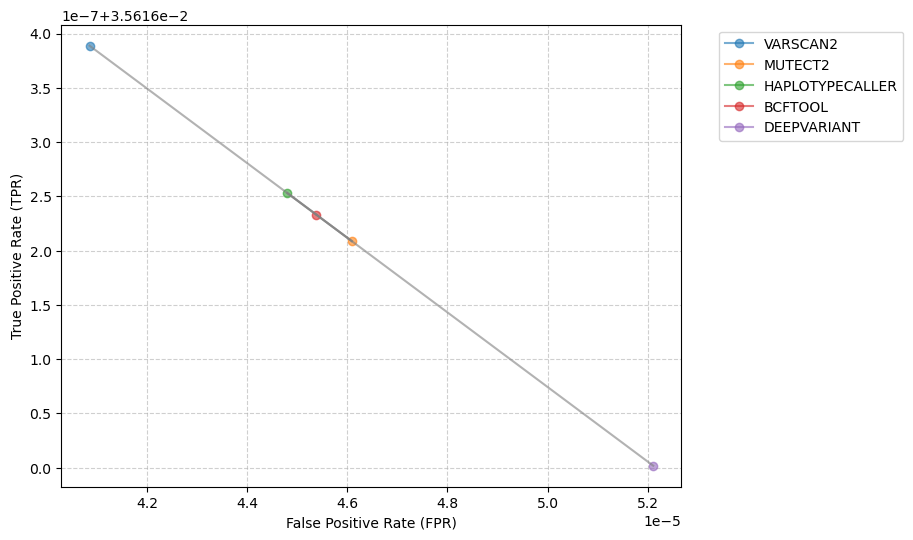

In [13]:
import matplotlib.pyplot as plt

# Data for a single sample
sample_name = "All samples TPR vs FPR"
Tool = ['VARSCAN2', 'MUTECT2', 'HAPLOTYPECALLER', 'BCFTOOL', 'DEEPVARIANT']
TPR = [0.035616388751166, 0.035616208695371, 0.0356162529750188, 0.0356162329847761, 0.0356160017360104]
FPR = [0.000040847124792065, 0.0000460885793092558, 0.0000447995964627301, 0.0000453815139467517, 0.0000521131304231037]

# Create a single figure
plt.figure(figsize=(8, 6))

# Plot TPR vs. FPR for each tool with lines connecting the dots
for i in range(len(Tool)):
    plt.plot(FPR[i], TPR[i], marker='o', label=Tool[i], alpha=0.6)

# Add lines connecting the dots for each tool
for i in range(len(Tool) - 1):
    plt.plot([FPR[i], FPR[i+1]], [TPR[i], TPR[i+1]], linestyle='-', color='gray', alpha=0.6)

# Add labels and a legend to the right of the plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'')
legend = plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Show the plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/sen_spe_files_07_09_2023/new_output_files/0.001_ROC_TPR_FPR.png', dpi=450, bbox_inches='tight')

plt.show()

# Accuracy vs Precision

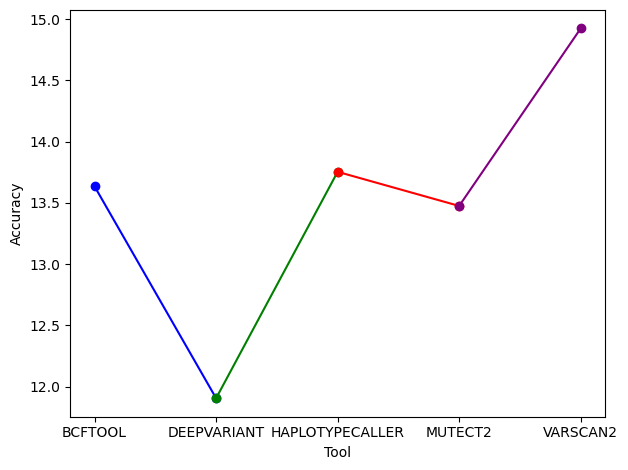

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Tool": ["BCFTOOL", "DEEPVARIANT", "HAPLOTYPECALLER", "MUTECT2", "VARSCAN2"],
    "Accuracy": [13.6344110029222, 11.9064625864754, 13.7534088580005, 13.4751077953696, 14.9226519912641]
}

df = pd.DataFrame(data)

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create the line graph with lines and dots of different colors
for i in range(len(df) - 1):
    plt.plot(df["Tool"][i:i+2], df["Accuracy"][i:i+2], marker='o', linestyle='-', color=colors[i])

# Add labels and title
plt.xlabel("Tool")
plt.ylabel("Accuracy")
plt.title("")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)

# Display the graph
plt.tight_layout()
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/sen_spe_files_07_09_2023/new_output_files/0.001_Accuracy_all_samples.png', dpi=450, bbox_inches='tight')
plt.show()

ValueError: setting an array element with a sequence.

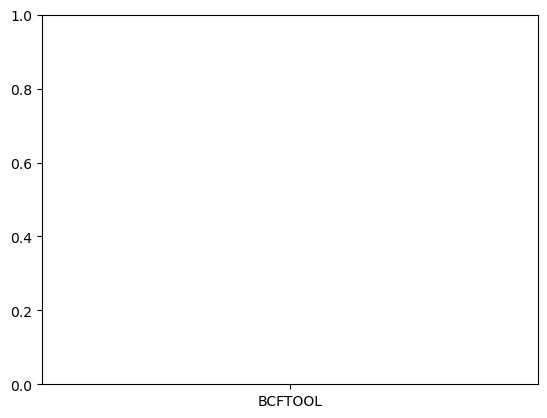

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data for different DP values
data = {
    "DP": [>=10, >=18, >=20, >=22, >=30],
    "Tool": ["BCFTOOL", "DEEPVARIANT", "HAPLOTYPECALLER", "MUTECT2", "VARSCAN2"],
    "Accuracy": [
        [13.6344110029222, 11.9064625864754, 13.7534088580005, 13.4751077953696, 14.9226519912641],
        [13.6344110029223, 11.9064625864755, 13.7534088580006, 13.4751077953697, 14.9226519912642],
        [13.6344110029224, 11.9064625864756, 13.7534088580007, 13.4751077953698, 14.9226519912643],
        [13.6344110029225, 11.9064625864757, 13.7534088580008, 13.4751077953699, 14.9226519912644],
        [13.6344110029226, 11.9064625864758, 13.7534088580009, 13.4751077953700, 14.9226519912645]
    ]
}

df = pd.DataFrame(data)

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create the line graph with lines and dots of different colors
for i in range(len(df) - 1):
    plt.plot(df["Tool"][i:i+2], df["Accuracy"][i:i+2], marker='o', linestyle='-', color=colors[i])

# Add labels and title
plt.xlabel("Tool")
plt.ylabel("Accuracy")
plt.title("")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)

# Display the graph
plt.tight_layout()
plt.show()

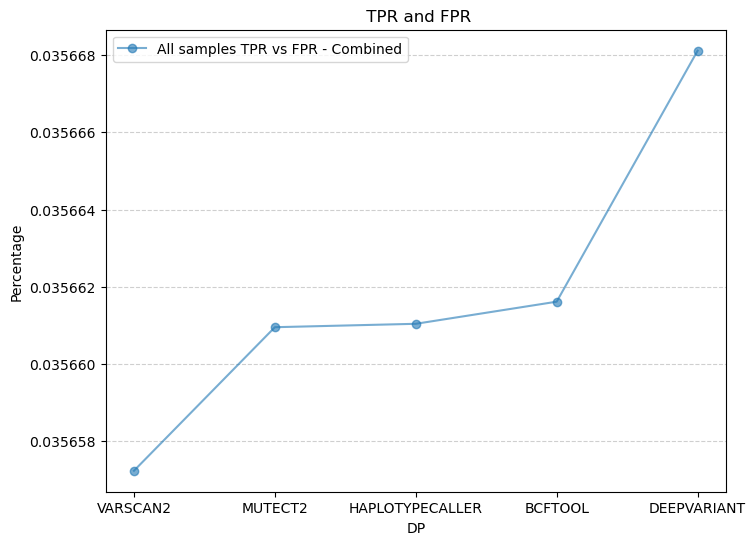

In [42]:
import matplotlib.pyplot as plt

# Data for a single sample
sample_name = "All samples TPR vs FPR"
Tool = ['VARSCAN2', 'MUTECT2', 'HAPLOTYPECALLER', 'BCFTOOL', 'DEEPVARIANT']
TPR = [0.035616389, 0.035616257, 0.035616253, 0.035616233, 0.035616002]
FPR = [0.0000408471, 0.0000446965, 0.0000447887, 0.0000453815, 0.0000521131]

# Create a single figure
plt.figure(figsize=(8, 6))

# Combine specificity and sensitivity into a single line
combined_line = [TPR[i] + FPR[i] for i in range(len(tools))]

# Plot the combined line
plt.plot(range(len(tools)), combined_line, marker='o', label=f'{sample_name} - Combined', alpha=0.6)

# Add labels and a legend outside the plot
plt.xticks(range(len(Tool)), Tool)
plt.xlabel('DP')
plt.ylabel('Percentage')
plt.title(f' TPR and FPR')
legend = plt.legend(loc='upper left')

# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()

# VCF CLIN_COND extraction

In [1]:
import pandas as pd
vcf = pd.read_csv(r'C:/Users/GenepoweRx_Madhu/Downloads/sen_spe_files_07_09_2023/VCC_input_files/12652707_BCFTOOL.vcf', comment='#', sep='\t', header=None, low_memory=False, encoding='latin-1')
vcf.columns = ['CHROM', 'POS', 'rsID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'SAMPLE']
vcf['AD'] = vcf['SAMPLE'].str.split(':').str[6]
vcf['RD'] = vcf['AD'].str.split(',').str[0].astype(int)
vcf['A_D'] = vcf['AD'].str.split(',').str[1].astype(int)
vcf['VAF'] = vcf['A_D'] / (vcf['RD'] + vcf['A_D'])
vcf['DP'] = vcf['INFO'].str.extract(r'DP=(\d+)')[0].fillna('0').astype(int)
#filter_var = vcf[vcf['VAF'] >= 0.001]
#filter_var_DP = filter_var[filter_var['DP'] >= 10]
#filter_var_DP = vcf.copy()
vcf

,CHROM,POS,rsID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,AD,RD,A_D,VAF,DP
0,chr1,817514,rs3131971,T,C,85.9373,.,"DP=244;ADF=122,82;ADR=3,19;AD=125,101;SCR=0;VD...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:114,17,0:226:43:122,82:3,19:125,101:0","125,101",125,101,0.446903,244
1,chr1,930939,rs9988021,G,A,225.4170,.,"DP=71;ADF=0,54;ADR=0,11;AD=0,65;SCR=0;VDB=0.49...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:255,196,0:65:0:0,54:0,11:0,65:0","0,65",0,65,1.000000,71
2,chr1,935954,rs4072383,G,T,224.4170,.,"DP=19;ADF=0,2;ADR=0,11;AD=0,13;SCR=0;VDB=0.087...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:254,39,0:13:0:0,2:0,11:0,13:0","0,13",0,13,1.000000,19
3,chr1,941119,rs4372192,A,G,225.4170,.,"DP=23;ADF=0,17;ADR=0,3;AD=0,20;SCR=0;VDB=0.280...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:255,60,0:20:0:0,17:0,3:0,20:0","0,20",0,20,1.000000,23
4,chr1,944858,rs3748592,A,G,225.4170,.,"DP=20;ADF=0,11;ADR=0,7;AD=0,18;SCR=0;VDB=0.165...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:255,54,0:18:0:0,11:0,7:0,18:0","0,18",0,18,1.000000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77296,chrY,11155547,rs62599748,T,A,121.4150,.,"DP=53;ADF=0,40;ADR=0,5;AD=0,45;SCR=0;VDB=0.166...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:151,135,0:45:0:0,40:0,5:0,45:0","0,45",0,45,1.000000,53
77297,chrY,12340004,rs377316799,G,T,200.4160,.,"DP=52;ADF=0,24;ADR=0,27;AD=0,51;SCR=0;VDB=0.17...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:230,154,0:51:0:0,24:0,27:0,51:0","0,51",0,51,1.000000,52
77298,chrY,12914512,rs2032624,C,A,225.4170,.,"DP=33;ADF=0,24;ADR=0,6;AD=0,30;SCR=0;VDB=0.299...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:255,90,0:30:0:0,24:0,6:0,30:0","0,30",0,30,1.000000,33
77299,chrY,13250864,rs376039285,C,T,189.4160,.,"DP=28;ADF=0,25;ADR=0,0;AD=0,25;SCR=0;VDB=0.189...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:219,75,0:25:0:0,25:0,0:0,25:0","0,25",0,25,1.000000,28


In [2]:
vcf['CSQ'] = vcf['INFO'].str.extract(r'CSQ=(.*)')
vcf['csq'] = vcf['CSQ'].str.split(',')
vcf = vcf.explode('csq')
vcf

,CHROM,POS,rsID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,AD,RD,A_D,VAF,DP,CSQ,csq
0,chr1,817514,rs3131971,T,C,85.9373,.,"DP=244;ADF=122,82;ADR=3,19;AD=125,101;SCR=0;VD...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:114,17,0:226:43:122,82:3,19:125,101:0","125,101",125,101,0.446903,244,C|non_coding_transcript_exon_variant|MODIFIER|...,C|non_coding_transcript_exon_variant|MODIFIER|...
0,chr1,817514,rs3131971,T,C,85.9373,.,"DP=244;ADF=122,82;ADR=3,19;AD=125,101;SCR=0;VD...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:114,17,0:226:43:122,82:3,19:125,101:0","125,101",125,101,0.446903,244,C|non_coding_transcript_exon_variant|MODIFIER|...,C|non_coding_transcript_exon_variant|MODIFIER|...
0,chr1,817514,rs3131971,T,C,85.9373,.,"DP=244;ADF=122,82;ADR=3,19;AD=125,101;SCR=0;VD...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:114,17,0:226:43:122,82:3,19:125,101:0","125,101",125,101,0.446903,244,C|non_coding_transcript_exon_variant|MODIFIER|...,C|intron_variant&non_coding_transcript_variant...
0,chr1,817514,rs3131971,T,C,85.9373,.,"DP=244;ADF=122,82;ADR=3,19;AD=125,101;SCR=0;VD...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:114,17,0:226:43:122,82:3,19:125,101:0","125,101",125,101,0.446903,244,C|non_coding_transcript_exon_variant|MODIFIER|...,C|intron_variant&non_coding_transcript_variant...
0,chr1,817514,rs3131971,T,C,85.9373,.,"DP=244;ADF=122,82;ADR=3,19;AD=125,101;SCR=0;VD...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:114,17,0:226:43:122,82:3,19:125,101:0","125,101",125,101,0.446903,244,C|non_coding_transcript_exon_variant|MODIFIER|...,C|regulatory_region_variant|MODIFIER|||Regulat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77300,chrY,19732200,rs750047037,A,C,149.4160,.,"DP=10;ADF=0,0;ADR=0,10;AD=0,10;SCR=0;VDB=0.625...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:179,30,0:10:0:0,0:0,10:0,10:0","0,10",0,10,1.000000,10,C|intron_variant|MODIFIER|KDM5D|ENSG0000001281...,C|intron_variant|MODIFIER|KDM5D|ENSG0000001281...
77300,chrY,19732200,rs750047037,A,C,149.4160,.,"DP=10;ADF=0,0;ADR=0,10;AD=0,10;SCR=0;VDB=0.625...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:179,30,0:10:0:0,0:0,10:0,10:0","0,10",0,10,1.000000,10,C|intron_variant|MODIFIER|KDM5D|ENSG0000001281...,C|intron_variant|MODIFIER|KDM5D|ENSG0000001281...
77300,chrY,19732200,rs750047037,A,C,149.4160,.,"DP=10;ADF=0,0;ADR=0,10;AD=0,10;SCR=0;VDB=0.625...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:179,30,0:10:0:0,0:0,10:0,10:0","0,10",0,10,1.000000,10,C|intron_variant|MODIFIER|KDM5D|ENSG0000001281...,C|intron_variant|MODIFIER|KDM5D|ENSG0000001281...
77300,chrY,19732200,rs750047037,A,C,149.4160,.,"DP=10;ADF=0,0;ADR=0,10;AD=0,10;SCR=0;VDB=0.625...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:179,30,0:10:0:0,0:0,10:0,10:0","0,10",0,10,1.000000,10,C|intron_variant|MODIFIER|KDM5D|ENSG0000001281...,C|intron_variant|MODIFIER|KDM5D|ENSG0000001281...


In [5]:
vcf['ClinVar_CLNREVSTAT'] = vcf['csq'].str.split('|').str[80]
vcf

,CHROM,POS,rsID,REF,ALT,QUAL,FILTER,INFO,FORMAT,SAMPLE,AD,RD,A_D,VAF,DP,CSQ,csq,ClinVar_CLNREVSTAT
0,chr1,817514,rs3131971,T,C,85.9373,.,"DP=244;ADF=122,82;ADR=3,19;AD=125,101;SCR=0;VD...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:114,17,0:226:43:122,82:3,19:125,101:0","125,101",125,101,0.446903,244,C|non_coding_transcript_exon_variant|MODIFIER|...,C|non_coding_transcript_exon_variant|MODIFIER|...,
0,chr1,817514,rs3131971,T,C,85.9373,.,"DP=244;ADF=122,82;ADR=3,19;AD=125,101;SCR=0;VD...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:114,17,0:226:43:122,82:3,19:125,101:0","125,101",125,101,0.446903,244,C|non_coding_transcript_exon_variant|MODIFIER|...,C|non_coding_transcript_exon_variant|MODIFIER|...,
0,chr1,817514,rs3131971,T,C,85.9373,.,"DP=244;ADF=122,82;ADR=3,19;AD=125,101;SCR=0;VD...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:114,17,0:226:43:122,82:3,19:125,101:0","125,101",125,101,0.446903,244,C|non_coding_transcript_exon_variant|MODIFIER|...,C|intron_variant&non_coding_transcript_variant...,
0,chr1,817514,rs3131971,T,C,85.9373,.,"DP=244;ADF=122,82;ADR=3,19;AD=125,101;SCR=0;VD...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:114,17,0:226:43:122,82:3,19:125,101:0","125,101",125,101,0.446903,244,C|non_coding_transcript_exon_variant|MODIFIER|...,C|intron_variant&non_coding_transcript_variant...,
0,chr1,817514,rs3131971,T,C,85.9373,.,"DP=244;ADF=122,82;ADR=3,19;AD=125,101;SCR=0;VD...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:114,17,0:226:43:122,82:3,19:125,101:0","125,101",125,101,0.446903,244,C|non_coding_transcript_exon_variant|MODIFIER|...,C|regulatory_region_variant|MODIFIER|||Regulat...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77300,chrY,19732200,rs750047037,A,C,149.4160,.,"DP=10;ADF=0,0;ADR=0,10;AD=0,10;SCR=0;VDB=0.625...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:179,30,0:10:0:0,0:0,10:0,10:0","0,10",0,10,1.000000,10,C|intron_variant|MODIFIER|KDM5D|ENSG0000001281...,C|intron_variant|MODIFIER|KDM5D|ENSG0000001281...,
77300,chrY,19732200,rs750047037,A,C,149.4160,.,"DP=10;ADF=0,0;ADR=0,10;AD=0,10;SCR=0;VDB=0.625...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:179,30,0:10:0:0,0:0,10:0,10:0","0,10",0,10,1.000000,10,C|intron_variant|MODIFIER|KDM5D|ENSG0000001281...,C|intron_variant|MODIFIER|KDM5D|ENSG0000001281...,
77300,chrY,19732200,rs750047037,A,C,149.4160,.,"DP=10;ADF=0,0;ADR=0,10;AD=0,10;SCR=0;VDB=0.625...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:179,30,0:10:0:0,0:0,10:0,10:0","0,10",0,10,1.000000,10,C|intron_variant|MODIFIER|KDM5D|ENSG0000001281...,C|intron_variant|MODIFIER|KDM5D|ENSG0000001281...,
77300,chrY,19732200,rs750047037,A,C,149.4160,.,"DP=10;ADF=0,0;ADR=0,10;AD=0,10;SCR=0;VDB=0.625...",GT:PL:DP:SP:ADF:ADR:AD:SCR,"1/1:179,30,0:10:0:0,0:0,10:0,10:0","0,10",0,10,1.000000,10,C|intron_variant|MODIFIER|KDM5D|ENSG0000001281...,C|intron_variant|MODIFIER|KDM5D|ENSG0000001281...,


In [13]:
grp1 = vcf.groupby(['CHROM', 'POS', 'rsID', 'REF', 'ALT']).agg({'ClinVar_CLNREVSTAT': lambda x: ','.join(str(i) for i in x.unique()),
                                                               'VAF': lambda x: ','.join(str(i) for i in x.unique()),
                                                               'DP': lambda x: ','.join(str(i) for i in x.unique())}).reset_index()
grp1

,CHROM,POS,rsID,REF,ALT,ClinVar_CLNREVSTAT,VAF,DP
0,chr1,817514,rs3131971,T,C,,0.4469026548672566,244
1,chr1,930939,rs9988021,G,A,,1.0,71
2,chr1,935954,rs4072383,G,T,,1.0,19
3,chr1,941119,rs4372192,A,G,,1.0,23
4,chr1,944858,rs3748592,A,G,,1.0,20
...,...,...,...,...,...,...,...,...
77296,chrY,11155547,rs62599748,T,A,,1.0,53
77297,chrY,12340004,rs377316799,G,T,,1.0,52
77298,chrY,12914512,rs2032624,C,A,,1.0,33
77299,chrY,13250864,rs376039285,C,T,,1.0,28


In [14]:
grp1.ClinVar_CLNREVSTAT.value_counts(dropna=False)

                                                                  58450
Benign                                                            17966
Benign/Likely_benign                                                434
Likely_benign                                                       211
Conflicting_interpretations_of_pathogenicity                         75
Uncertain_significance                                               58
drug_response                                                        36
association                                                          19
risk_factor                                                          18
not_provided                                                          9
Pathogenic                                                            3
protective                                                            3
Conflicting_interpretations_of_pathogenicity&risk_factor              2
Benign&other                                                    

In [ ]:
column_names=['Allele','Consequence','IMPACT','SYMBOL','Gene','Feature_type','Feature','BIOTYPE','EXON','INTRON','HGVSc','HGVSp','cDNA_position','CDS_position','Protein_position','Amino_acids','Codons','Existing_variation','DISTANCE','STRAND','FLAGS','VARIANT_CLASS','SYMBOL_SOURCE','HGNC_ID','CANONICAL','MANE_SELECT','MANE_PLUS_CLINICAL','TSL','APPRIS','CCDS','ENSP','SWISSPROT','TREMBL','UNIPARC','UNIPROT_ISOFORM','SOURCE','GENE_PHENO','SIFT','PolyPhen','DOMAINS','miRNA','HGVS_OFFSET','AF','AFR_AF','AMR_AF','EAS_AF','EUR_AF','SAS_AF','gnomADe_AF','gnomADe_AFR_AF','gnomADe_AMR_AF','gnomADe_ASJ_AF','gnomADe_EAS_AF','gnomADe_FIN_AF','gnomADe_NFE_AF','gnomADe_OTH_AF','gnomADe_SAS_AF','gnomADg_AF','gnomADg_AFR_AF','gnomADg_AMI_AF','gnomADg_AMR_AF','gnomADg_ASJ_AF','gnomADg_EAS_AF','gnomADg_FIN_AF','gnomADg_MID_AF','gnomADg_NFE_AF','gnomADg_OTH_AF','gnomADg_SAS_AF','MAX_AF','MAX_AF_POPS','CLIN_SIG','SOMATIC','PHENO','PUBMED','MOTIF_NAME','MOTIF_POS','HIGH_INF_POS','MOTIF_SCORE_CHANGE','TRANSCRIPTION_FACTORS','ClinVar','ClinVar_CLNSIG','ClinVar_CLNREVSTAT','ClinVar_CLNDN']

def process_csq(column_index, csq):
    values = [transcript.split('|')[column_index] for transcript in csq if transcript.split('|')[column_index]]
    return ','.join(set(values))

# Iterate through column names and apply processing function to create new columns
for i, col in enumerate(column_names):
    vcf[col] = vcf['INFO'].str.extract(r'CSQ=(.*)')
    vcf[col] = vcf[col].str.split(',').apply(lambda csq: process_csq(i, csq))

vcf